In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install numpy --upgrade
!pip install --upgrade pandas seaborn matplotlib

%matplotlib inline


#Alucar - Analisando as vendas

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [ ]:
alucar = pd.read_csv('alucar.csv')

In [ ]:
print('Quantidade de linhas e colunas:', alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [ ]:
print('Dados Nulos: ', alucar.isna().sum().sum())

Dados Nulos:  0


In [ ]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

<Axes: xlabel='mes', ylabel='vendas'>

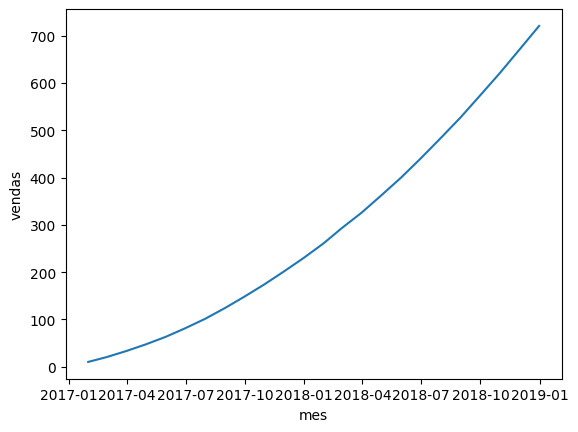

In [ ]:
sns.lineplot(x='mes', y='vendas', data=alucar)

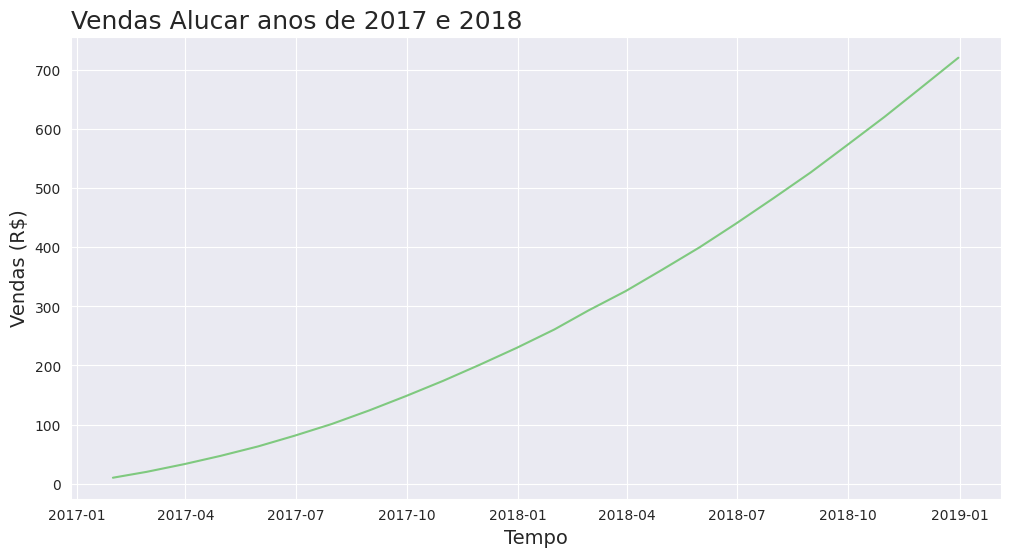

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax= sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12 , 6)
ax.set_title('Vendas Alucar anos de 2017 e 2018', loc= 'left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax=ax

In [ ]:
alucar['aumento'] = alucar['vendas'].diff() #subitração de um  mês para outro, para saber o aumento das vendas de um mês anterior
alucar

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0
5,2017-06-30,81,18.0
6,2017-07-31,101,20.0
7,2017-08-31,124,23.0
8,2017-09-30,148,24.0
9,2017-10-31,174,26.0


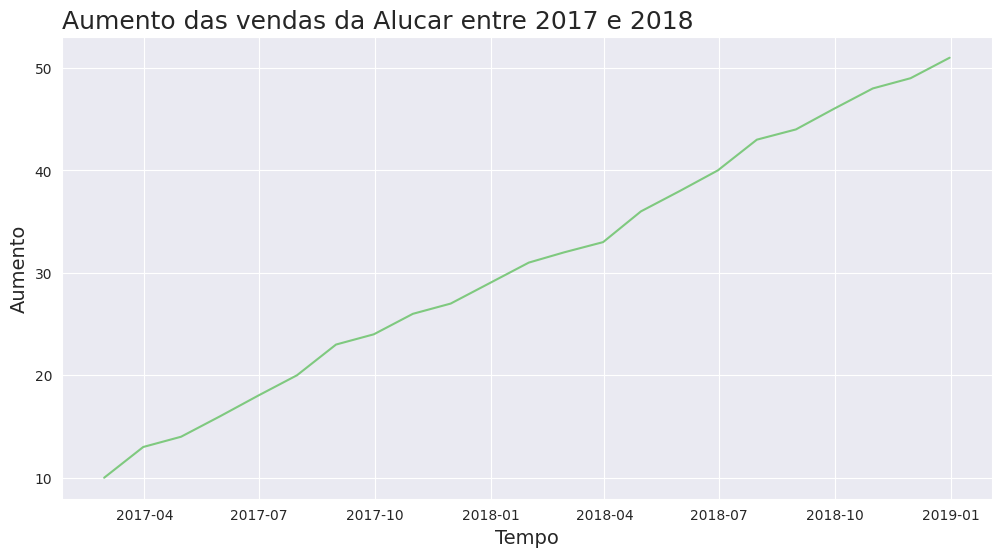

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax= sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12 , 6)
ax.set_title('Aumento das vendas da Alucar entre 2017 e 2018', loc= 'left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax=ax

In [ ]:
def plotar(titulo, labelx, labely, x, y, dataset): #criando uma função que já deixa parametrizado os itens para ajustar o gráfico
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax= sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12 , 6)
  ax.set_title(titulo, loc= 'left', fontsize=18)
  ax.set_xlabel('Tempo', fontsize=14)
  ax.set_ylabel('Aumento', fontsize=14)
  ax=ax

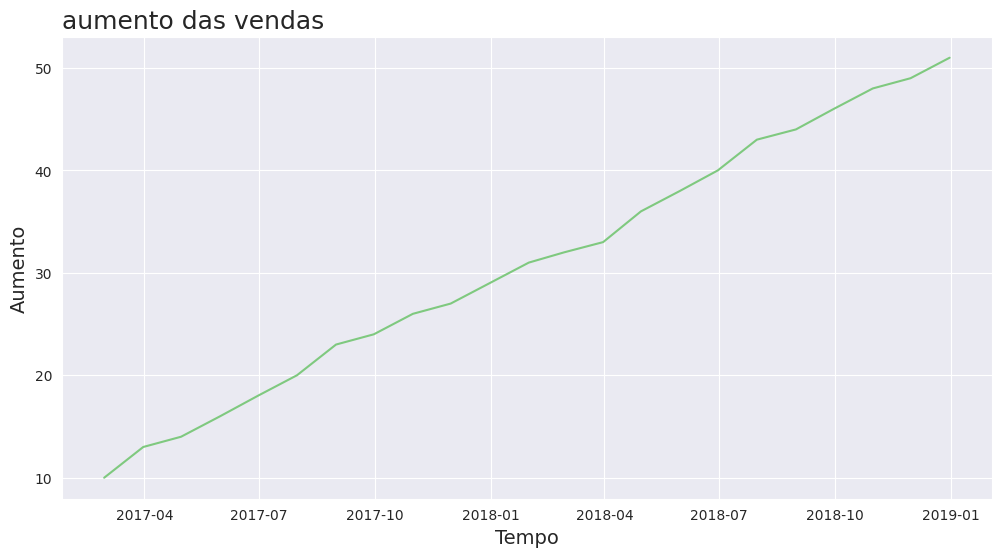

In [ ]:
plotar('aumento das vendas', 'tempo', 'aumento', 'mes', 'aumento', alucar )

In [ ]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0
5,2017-06-30,81,18.0,2.0
6,2017-07-31,101,20.0,2.0
7,2017-08-31,124,23.0,3.0
8,2017-09-30,148,24.0,1.0
9,2017-10-31,174,26.0,2.0


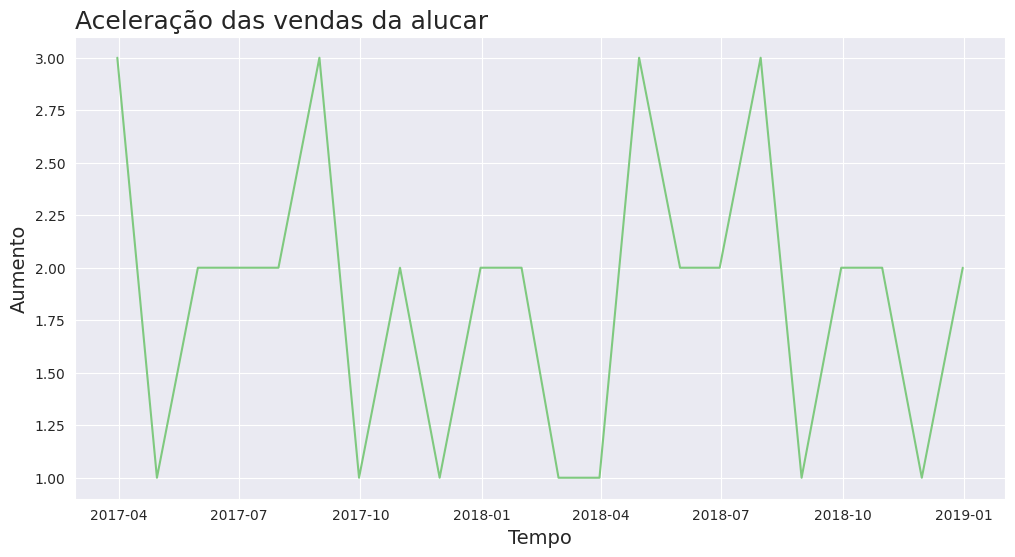

In [ ]:
plotar('Aceleração das vendas da alucar', 'tempo','aceleracao','mes','aceleracao',alucar)

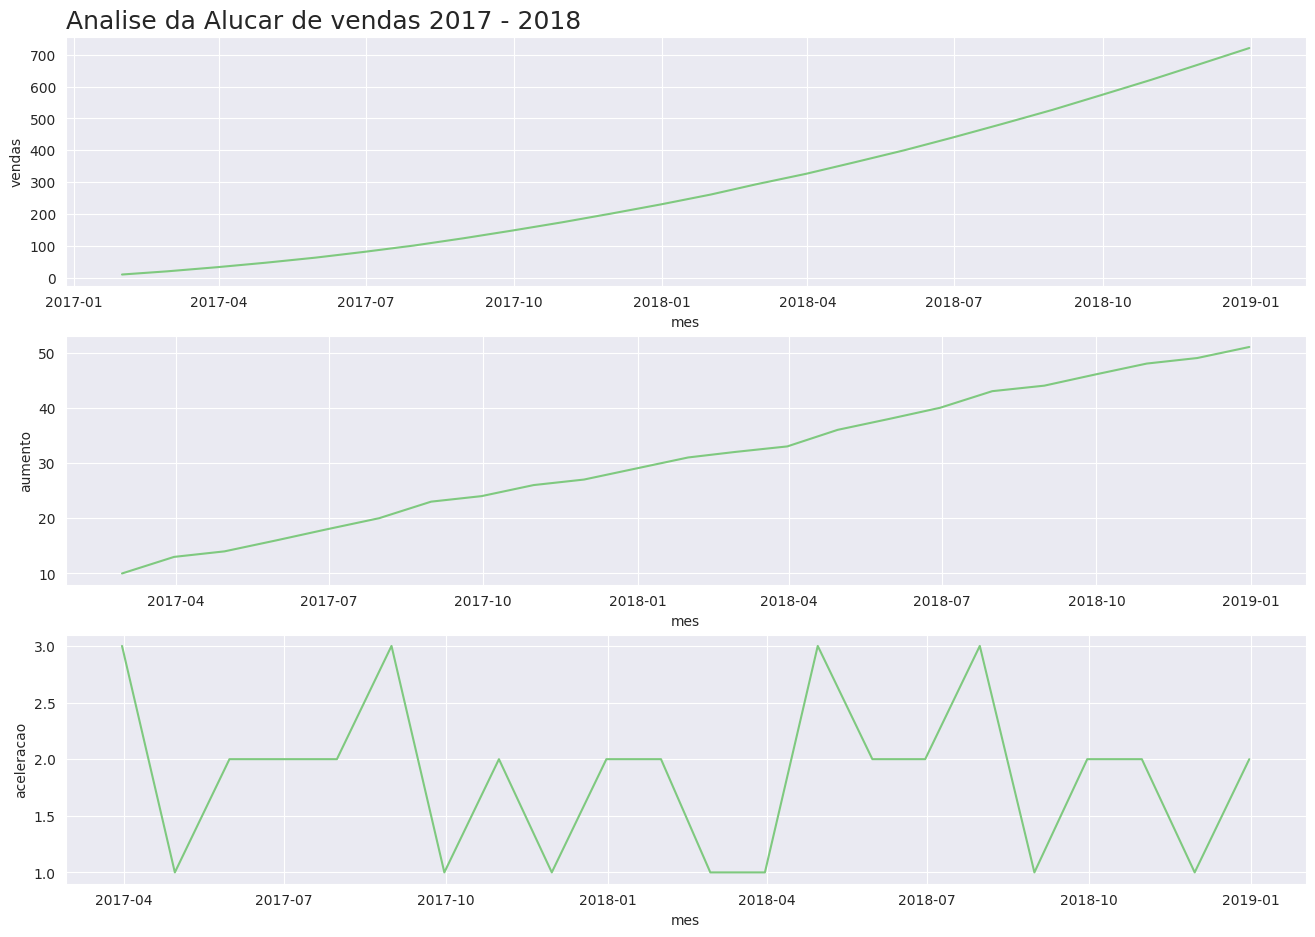

In [ ]:
plt.figure(figsize=(16,11))
ax= plt.subplot(3,1,1)
ax.set_title('Analise da Alucar de vendas 2017 - 2018', fontsize=18, loc='left',)
sns.lineplot(x='mes',y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes',y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes',y='aceleracao', data=alucar)
ax=ax

In [ ]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,11))
  ax= plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18, loc='left',)
  sns.lineplot(x=x,y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x,y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x,y=y3, data=dataset)
  ax=ax

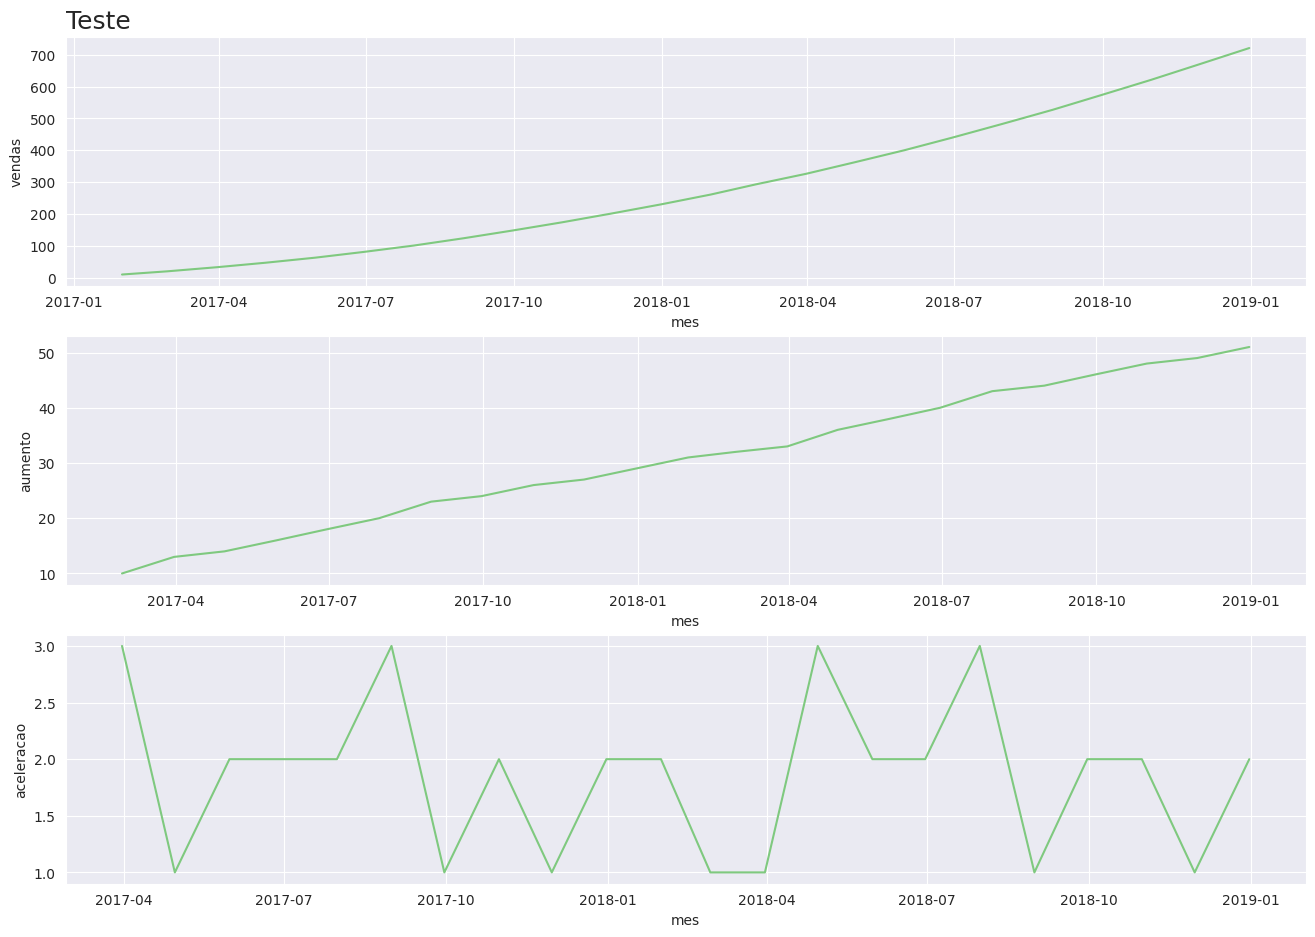

In [ ]:
plot_comparacao('mes', 'vendas','aumento','aceleracao',alucar,'Teste' )

In [ ]:
from pandas.plotting import autocorrelation_plot

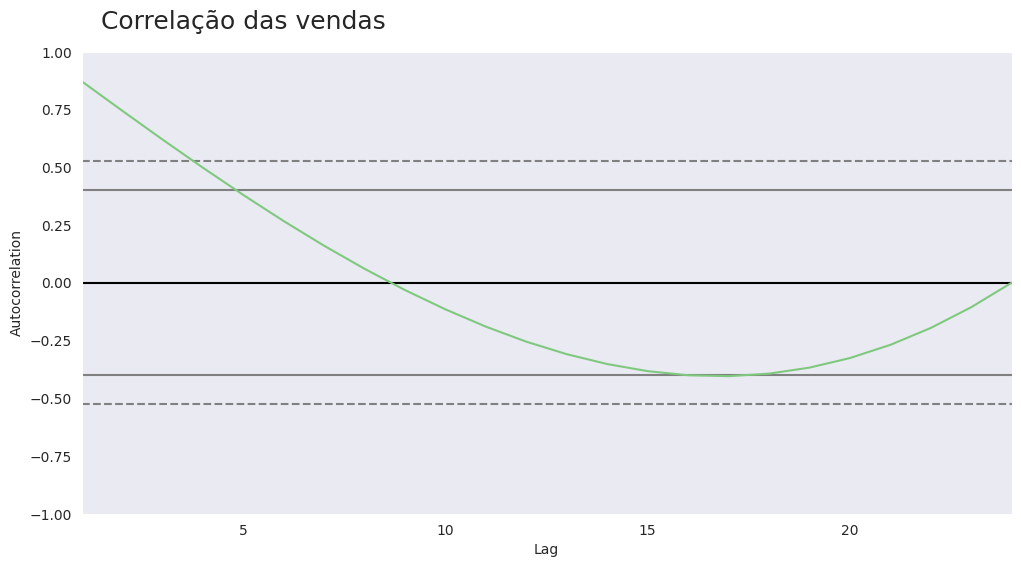

In [ ]:
 #Utilizamos a biblioteca pandas.plotting para gerar o gráfico de autocorrelação e observamos que no gráfico de
#autocorrelação das vendas, há uma correlação significativa no Lag 1, que diminui ao longo do tempo até se tornar nula.
ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26,y=0.95)
autocorrelation_plot(alucar['vendas'])
ax=ax

#Alucar -  Analisando assinantes da newsletter

In [ ]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [ ]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [ ]:
print('Quantidade das linhas e colunas', assinantes.shape)
print('Quantidades de numeros nulo', assinantes.isna().sum().sum())

Quantidade das linhas e colunas (24, 2)
Quantidades de numeros nulo 0


In [ ]:
assinantes['mes']=pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [ ]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


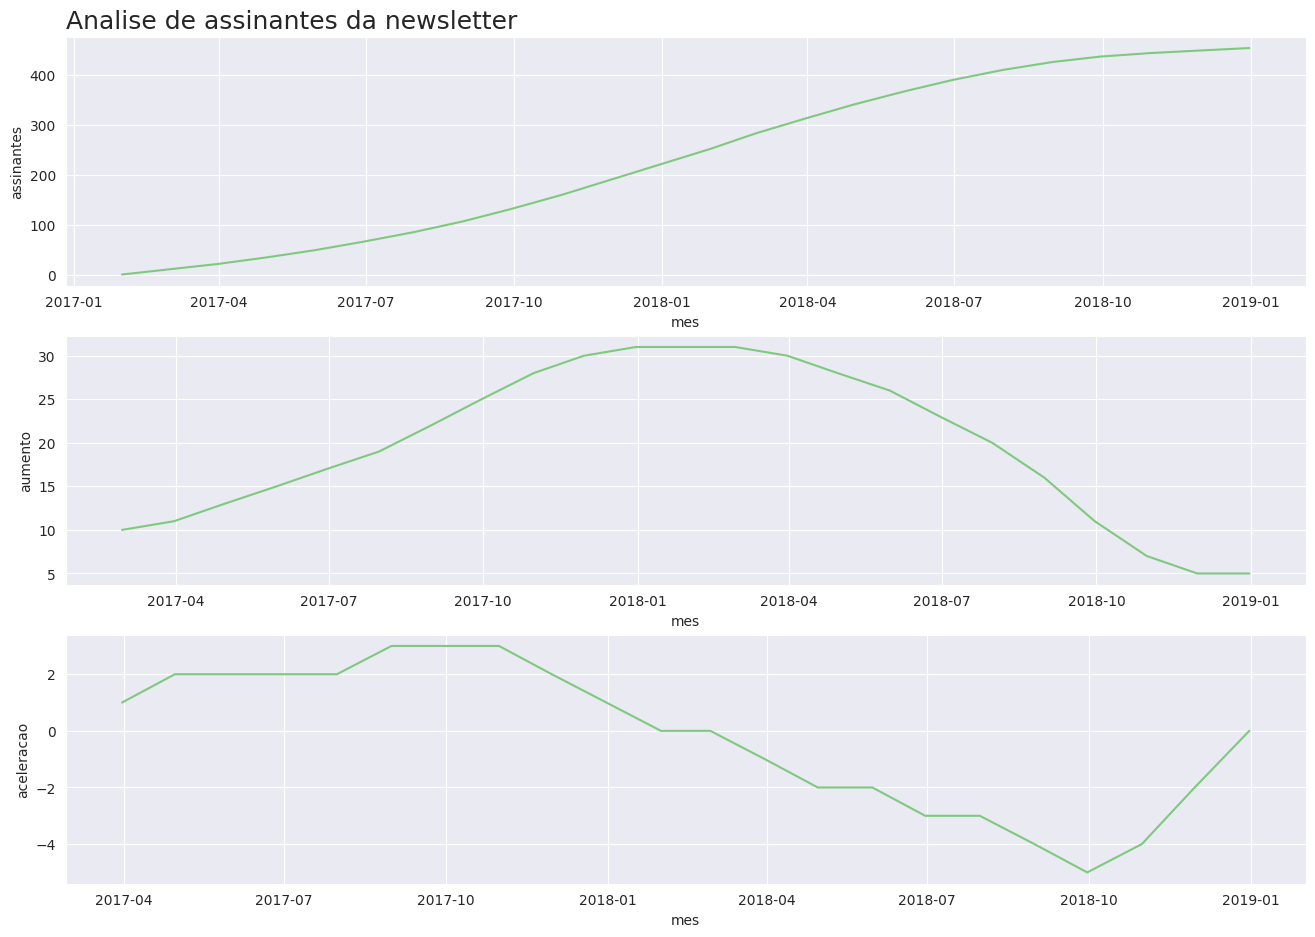

In [ ]:
plot_comparacao('mes','assinantes','aumento','aceleracao',assinantes,'Analise de assinantes da newsletter')

#Analisando as vendas - Chocolura

In [ ]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [ ]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
chocolura ['mes']= pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print('Quantidades de nulos:', chocolura.isna().sum().sum())
print('Quantidade de linhas:', chocolura.shape)

Quantidades de nulos: 0
Quantidade de linhas: (24, 2)


In [ ]:
chocolura['aumento']= chocolura['vendas'].diff()
chocolura['aceleracao']=chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


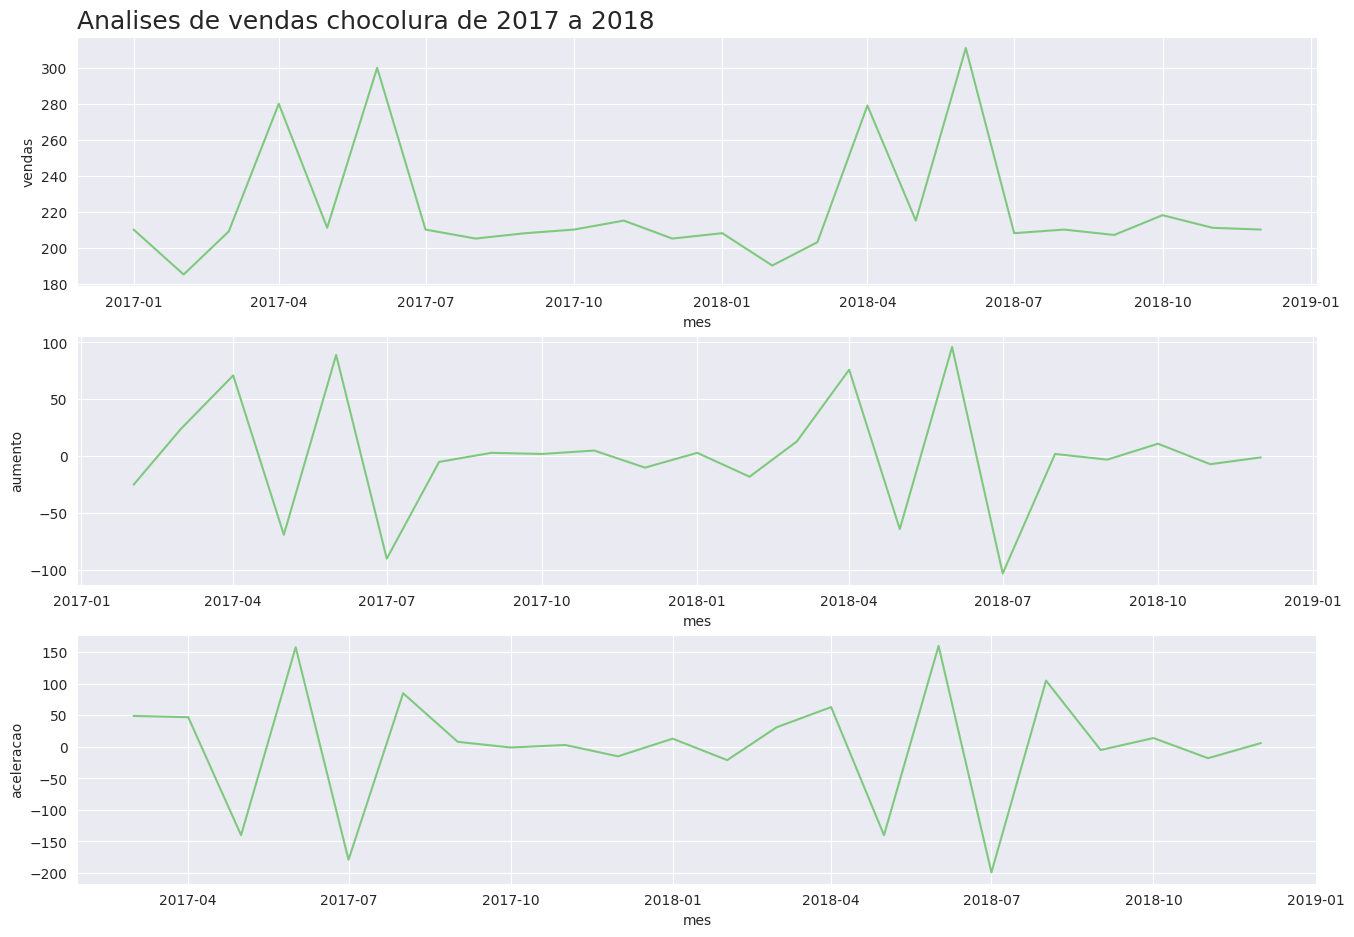

In [ ]:
plot_comparacao('mes','vendas','aumento','aceleracao',chocolura,'Analises de vendas chocolura de 2017 a 2018')

#Chocolura vendas diárias (outubro, novembro)

In [ ]:
vendas_por_dia = pd.read_csv("vendas_por_dia.csv")
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [ ]:
print('Quantidades de linhas e colunas:',vendas_por_dia.shape)
print('Quantiade de nulos:',vendas_por_dia.isna().sum().sum())

Quantidades de linhas e colunas: (61, 2)
Quantiade de nulos: 0


In [ ]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
vendas_por_dia['aumento']=vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao']=vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


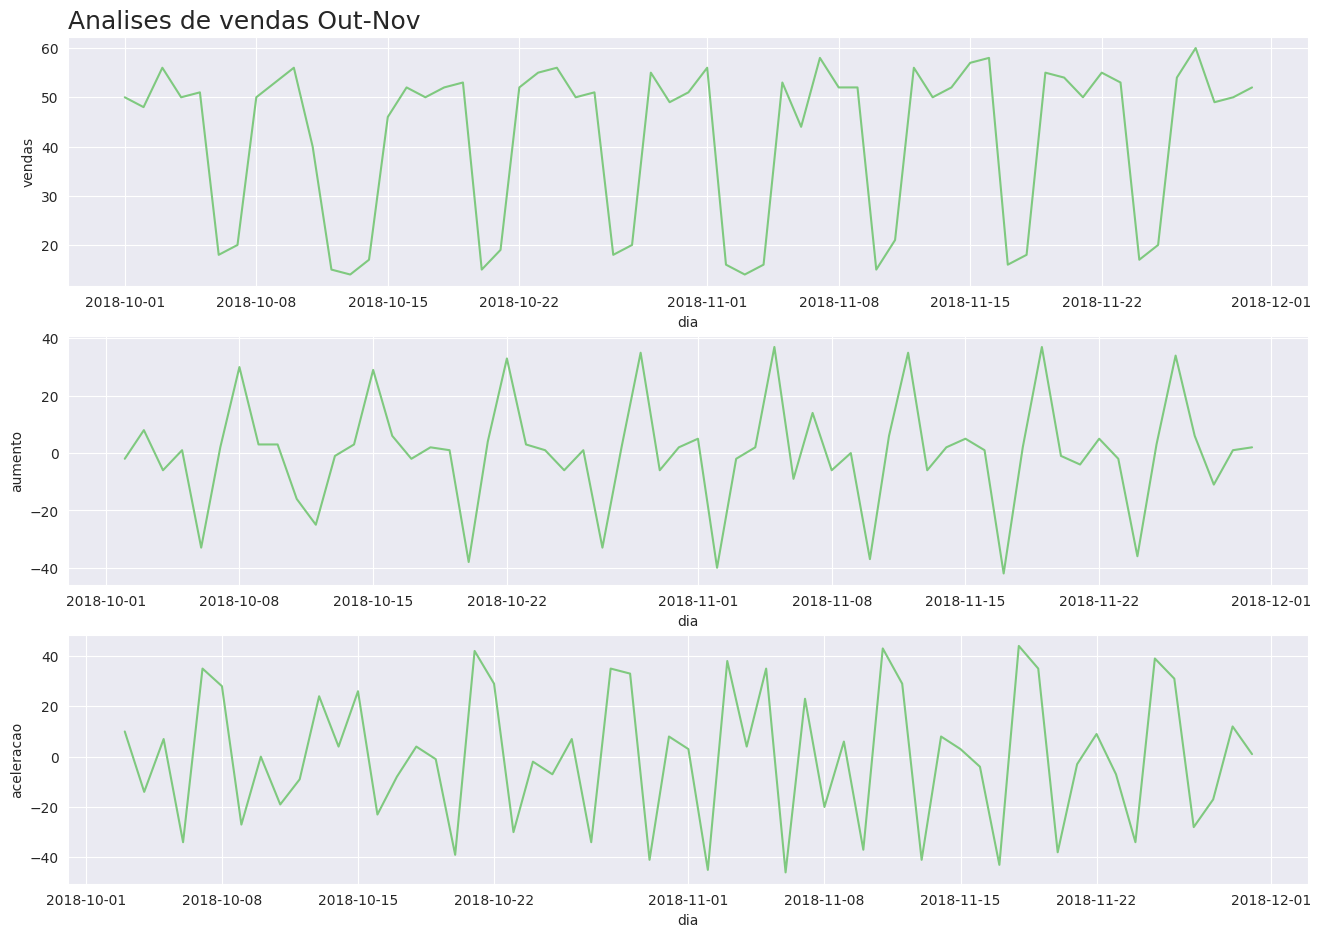

In [ ]:
plot_comparacao('dia','vendas','aumento','aceleracao',vendas_por_dia,'Analises de vendas Out-Nov')


**Analisando a sazonalidade**

In [ ]:
import pandas as pd
vendas_por_dia['dia'].dtype
vendas_por_dia['dia']=pd.to_datetime(vendas_por_dia['dia'])

In [ ]:
import pandas as pd
vendas_por_dia['dia'].dtype
vendas_por_dia['dia']=pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia['dia_da_semana']= vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [ ]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
dias_traduzidos={'Monday':'Segunda', 'Tuesday':'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sabado',
       'Sunday':'Domingo'}
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [ ]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


**Agrupando os dias**

In [ ]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()
#agrupapando todas as colunas
#para fazer a mesma função de calcular as medias. Criado então uma outra variavel e usando o groupby e as funções no final.
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terça,52.0,-1.0,-34.0


In [ ]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


#Correlação das vendas diárias

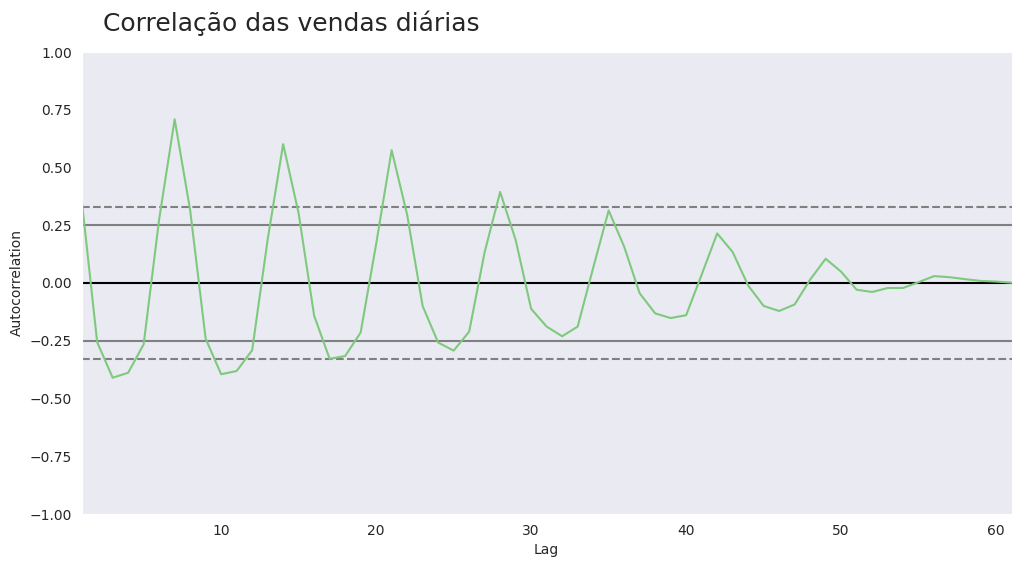

In [ ]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax=ax

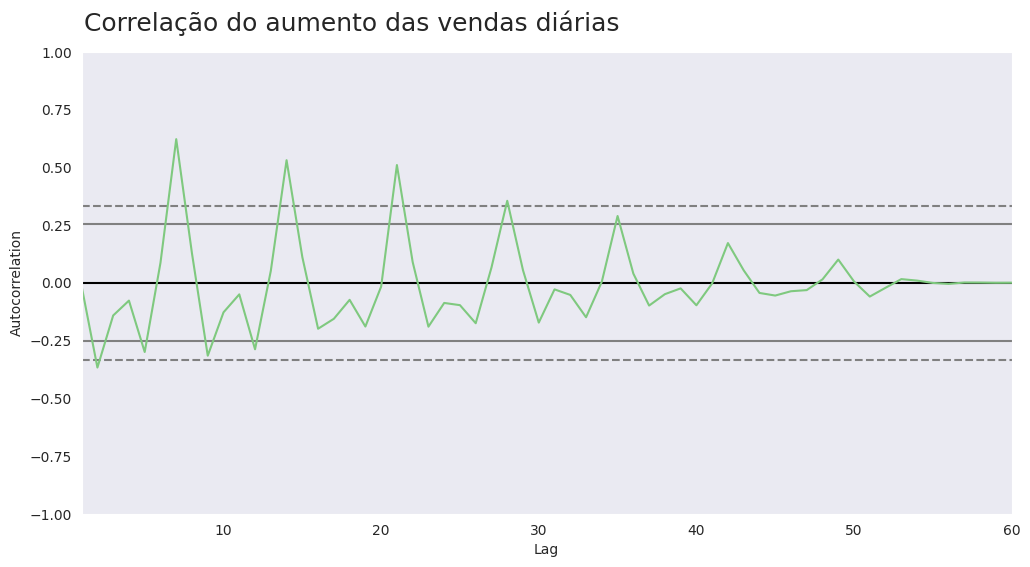

In [ ]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax=ax

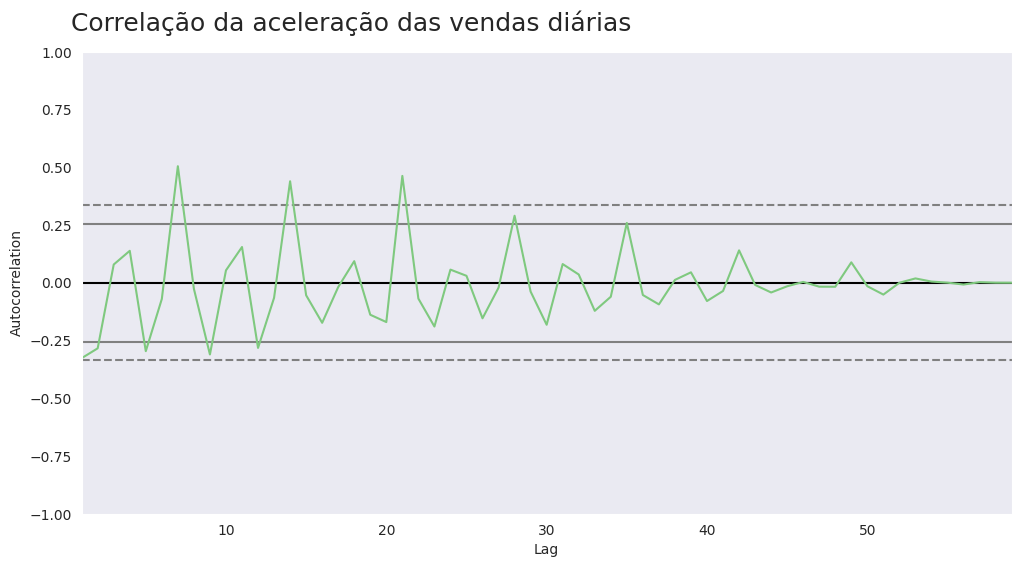

In [ ]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax=ax

#Cafélura analise de vendas

In [ ]:
cafelura= pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [ ]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
cafelura['mes']=pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


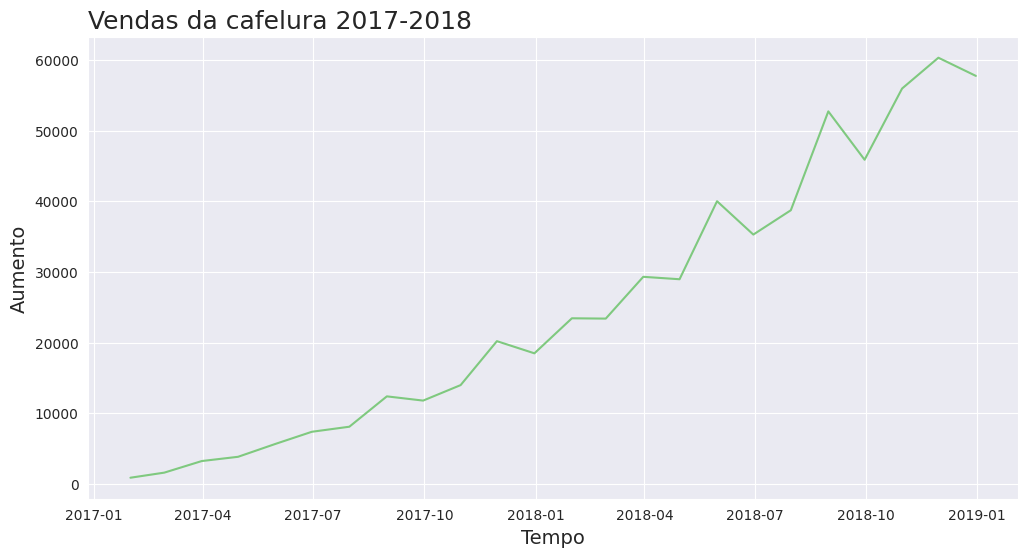

In [ ]:
plotar('Vendas da cafelura 2017-2018', 'tempo', 'vendas', 'mes', 'vendas', cafelura)

In [ ]:
dias_final_semana = pd.read_csv('dias_final_de_semana.csv')
dias_final_semana.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [ ]:
dias_final_semana['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [ ]:
cafelura['vendas_normalizadas']=cafelura['vendas']/dias_final_semana['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


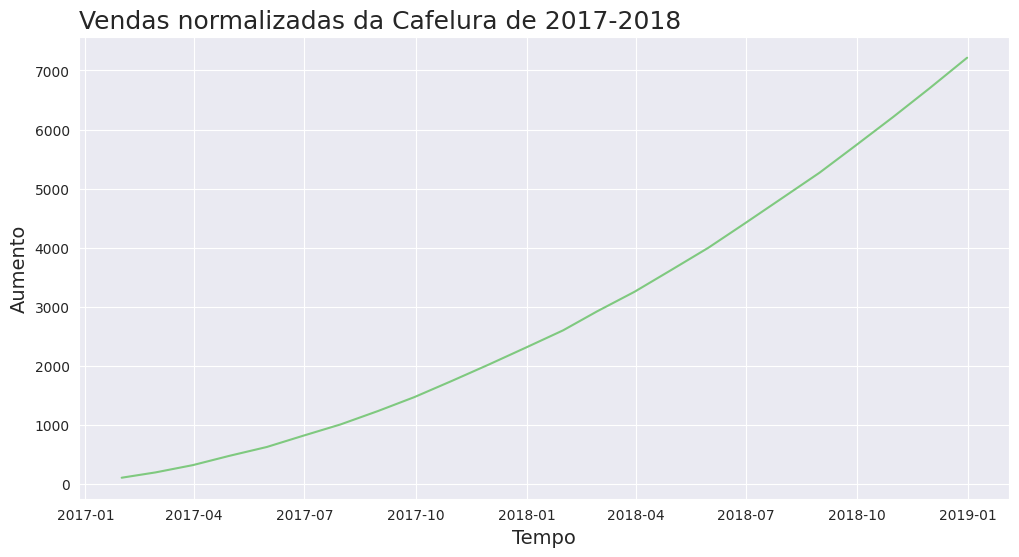

In [ ]:
plotar('Vendas normalizadas da Cafelura de 2017-2018 ', 'tempo','vendas_normalizadas', 'mes','vendas_normalizadas', cafelura)

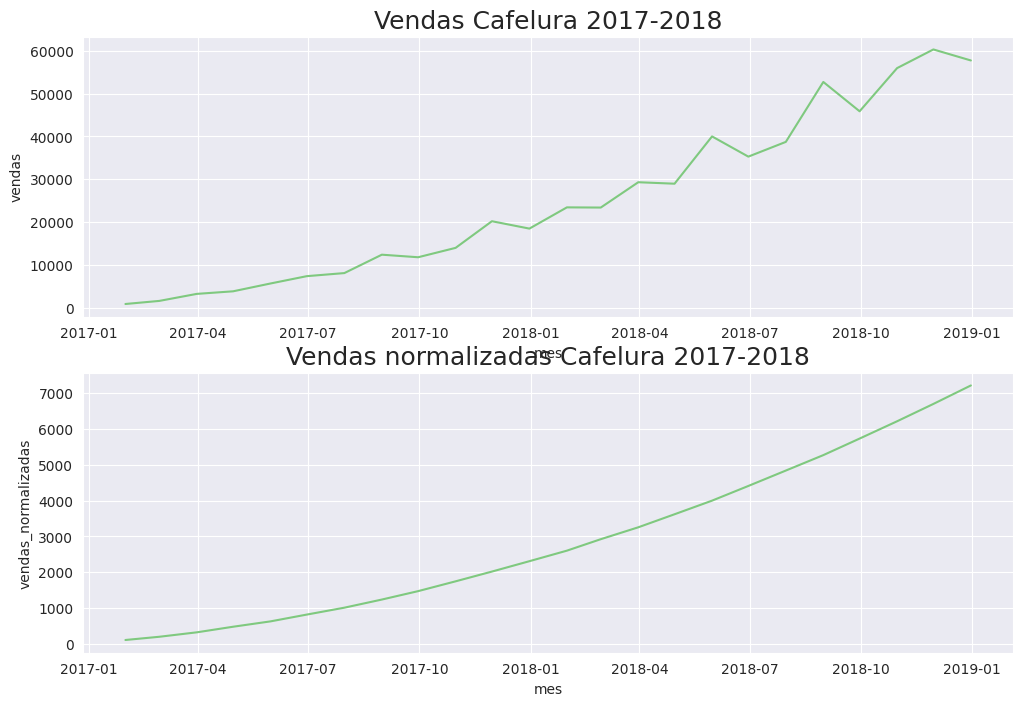

In [ ]:
plt.figure(figsize=(12,8))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017-2018',fontsize=18)
sns.lineplot(x='mes',y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017-2018',fontsize=18)
sns.lineplot(x='mes',y='vendas_normalizadas', data=cafelura)
ax=ax

#Statsmodels

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.DataFrame({'consumo atual': DADOS_LUZ_1['consumo atual']})
resultados = seasonal_decompose(data, period=1)
ax = resultados.plot()

NameError: name 'DADOS_LUZ_1' is not defined

In [ ]:
observacao = resultados.observed
tendencia = resultados.trend
sazonalidade = resultados.seasonal
ruido = resultados.resid

In [ ]:
data =({
    'obsservacao':observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})
resultados = pd.DataFrame(data)
resultados.head()

,obsservacao,tendencia,sazonalidade,ruido
0,210.0,210.0,0.0,0.0
1,185.0,185.0,0.0,0.0
2,209.0,209.0,0.0,0.0
3,280.0,280.0,0.0,0.0
4,211.0,211.0,0.0,0.0


#Analisando dados Alucel

In [ ]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [ ]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [ ]:
alucel['dia']=pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [ ]:
print('quantidade de linhas e colunas: ', alucel.shape)
print('quantiade de dados nulos: ', alucel.isna().sum().sum())

quantidade de linhas e colunas:  (61, 2)
quantiade de dados nulos:  0


In [ ]:
alucel['aumento']=alucel['vendas'].diff()
alucel['aceleracao']=alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


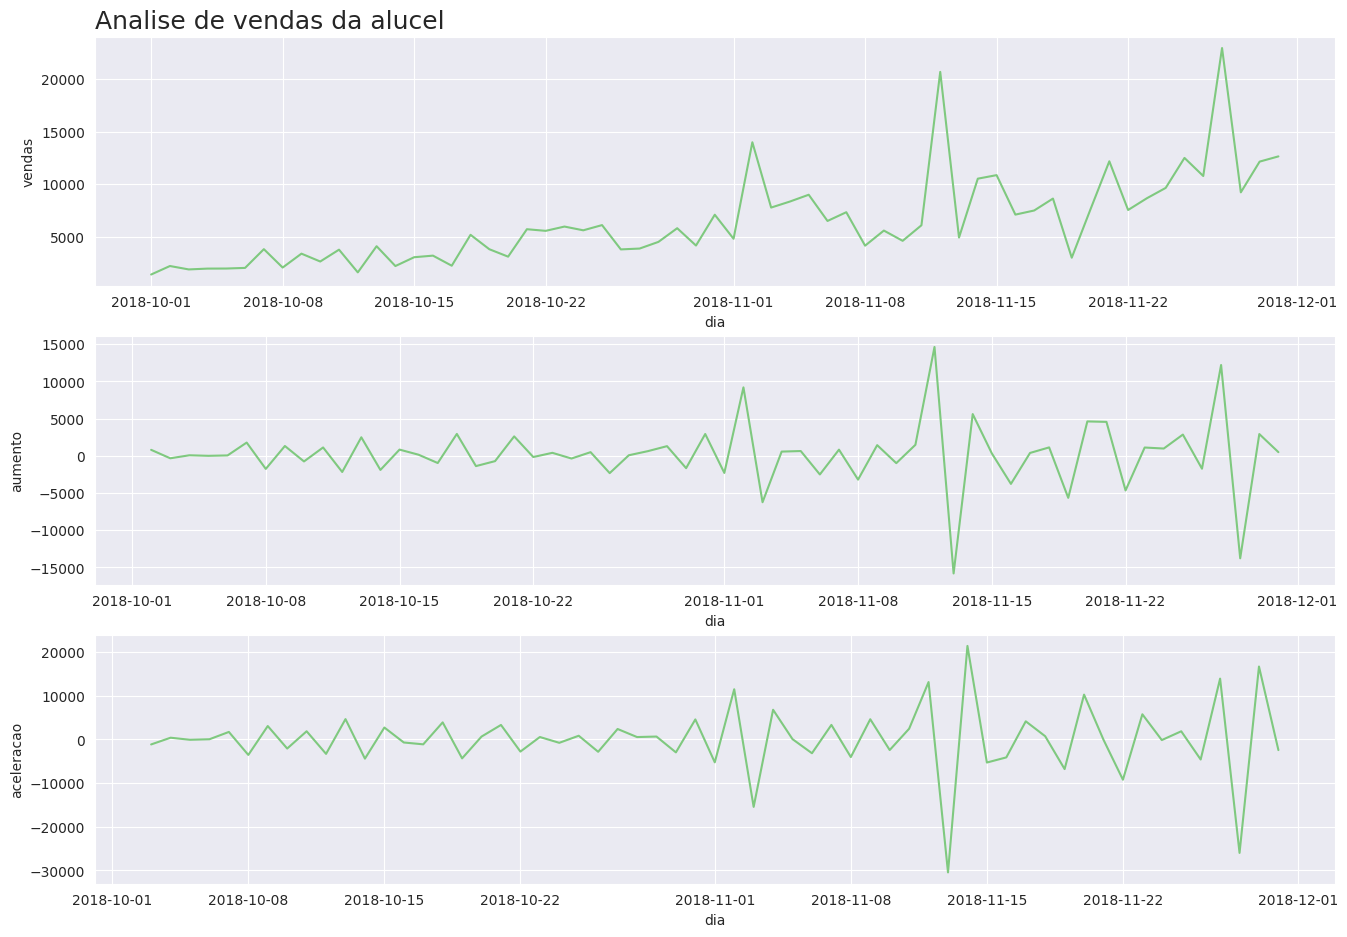

In [ ]:
plot_comparacao('dia', 'vendas','aumento','aceleracao',alucel, 'Análise de vendas da alucel')

Média Móvel

In [ ]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [ ]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel,media_movel_21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429,NaN


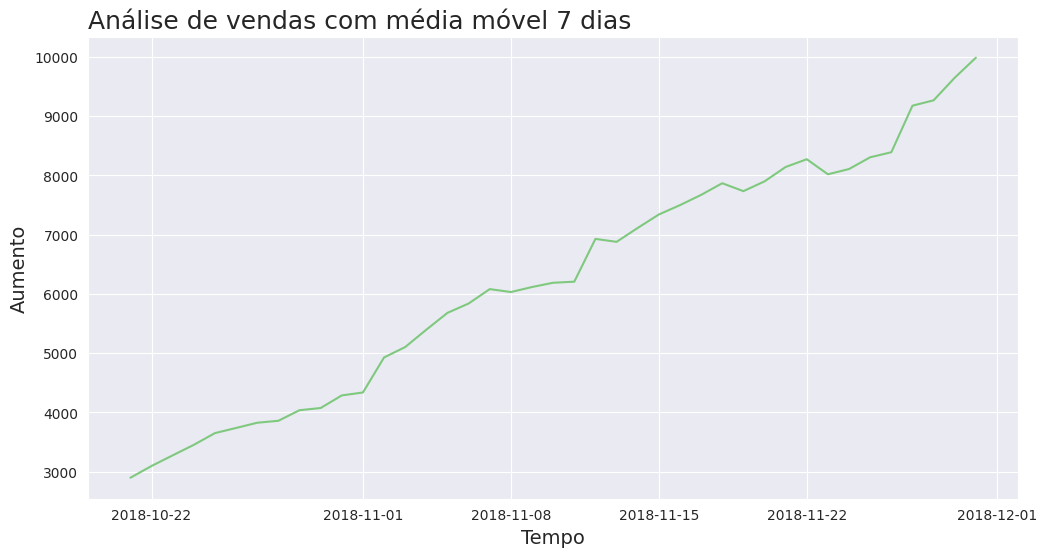

In [ ]:
plotar( 'Análise de vendas com média móvel 7 dias','tempo','media_movel', 'dia','media_movel', alucel)

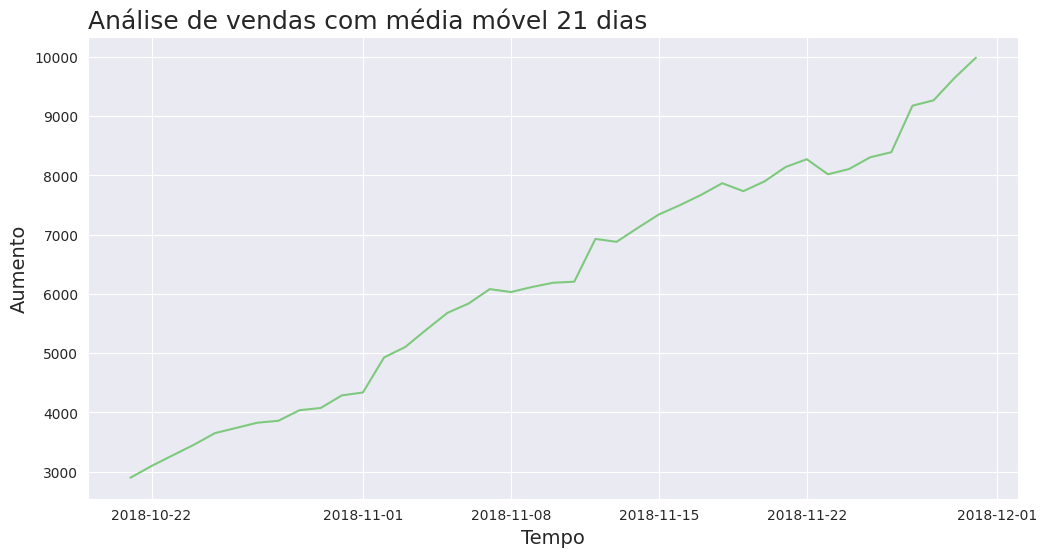

In [ ]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()
plotar( 'Análise de vendas com média móvel 21 dias','tempo','media_movel', 'dia', 'media_movel_21', alucel)

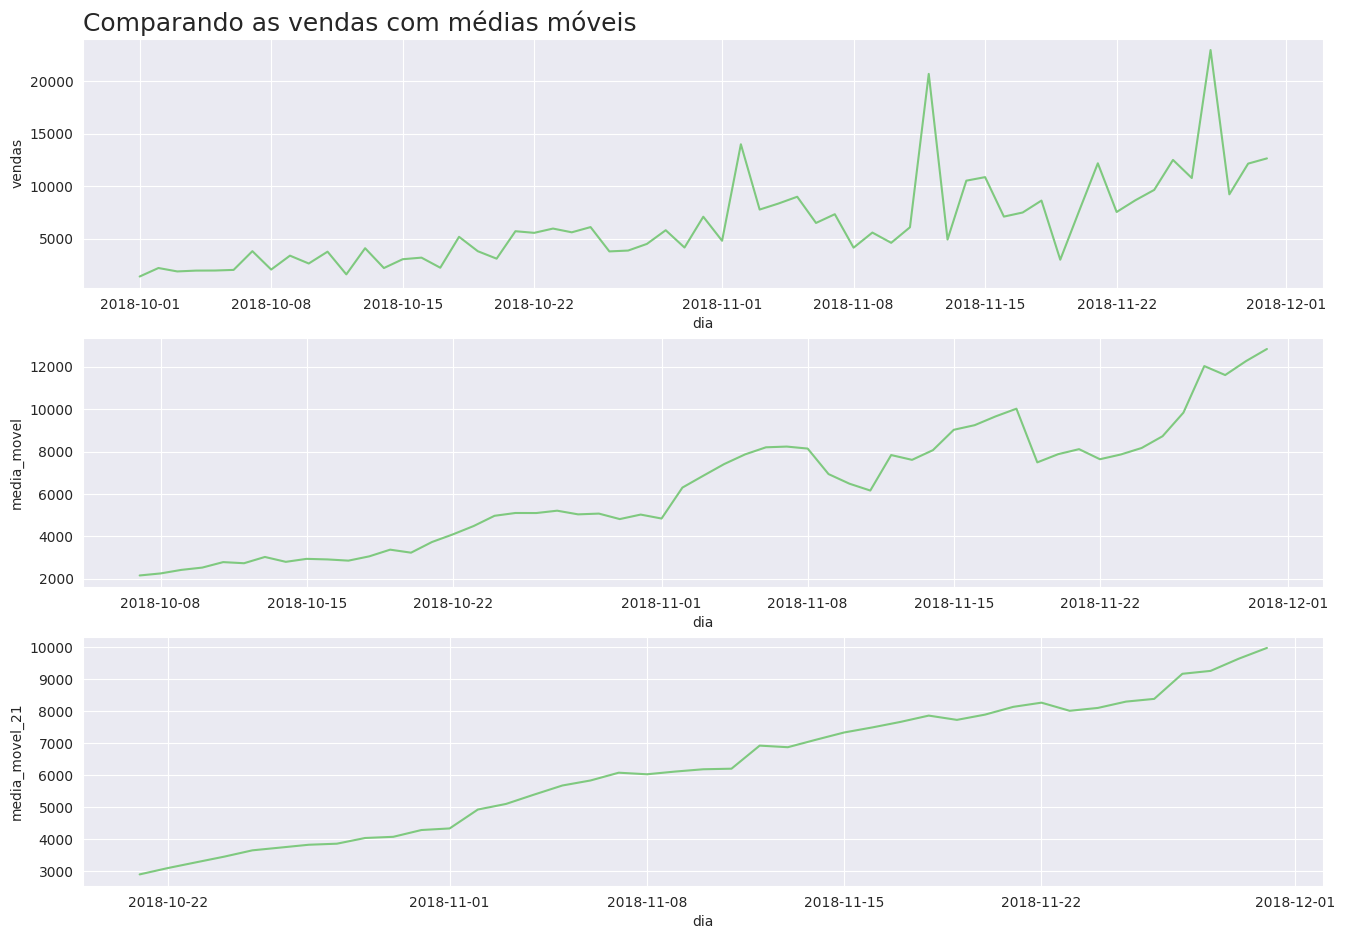

In [ ]:
plot_comparacao('dia','vendas','media_movel','media_movel_21',alucel,'Comparando as vendas com médias móveis')